### 0. Importing

In [1]:
# inporting the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# importing the csv files into dataframes
listings_summary = pd.read_csv('listings_summary.csv')
listings = pd.read_csv('listings.csv')

### 1. Data Cleaning

In [3]:
#dropping duplicate cols and then merging listings + listings_summary
listings.drop(['name', 'neighbourhood', 'price','host_id', 'host_name', 'latitude', 'longitude', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'last_review', 'calculated_host_listings_count', 'availability_365'], axis=1, inplace=True)
merged_listings = pd.merge(listings, listings_summary, how = 'inner', on='id')


In [4]:
merged_listings.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 0 to 22551
Data columns (total 97 columns):
id                                  22552 non-null int64
neighbourhood_group                 22552 non-null object
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
space                               14020 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
neighborhood_overview               11540 non-null object
notes                               7215 non-null object
transit                             13036 non-null object
access                              10837 non-null object
interaction                         10406 non-null object
house_rules             

In [5]:
# removing columns with more than 20% missing values
merged_listings=merged_listings.loc[:, merged_listings.isnull().mean() < .2]
merged_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 0 to 22551
Data columns (total 75 columns):
id                                  22552 non-null int64
neighbourhood_group                 22552 non-null object
listing_url                         22552 non-null object
scrape_id                           22552 non-null int64
last_scraped                        22552 non-null object
name                                22493 non-null object
summary                             21589 non-null object
description                         22349 non-null object
experiences_offered                 22552 non-null object
picture_url                         22552 non-null object
host_id                             22552 non-null int64
host_url                            22552 non-null object
host_name                           22526 non-null object
host_since                          22526 non-null object
host_location                       22436 non-null object
host_is_superhost       

In [6]:
#keeping only the columns needed 
cols = ['id', 'neighbourhood_group', 'name', 'host_id', 'host_is_superhost', 'latitude', 'longitude', 'room_type', 'amenities','price','guests_included', 'reviews_per_month' ]
merged_listings = merged_listings.loc[:,cols]


In [7]:
merged_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22552 entries, 0 to 22551
Data columns (total 12 columns):
id                     22552 non-null int64
neighbourhood_group    22552 non-null object
name                   22493 non-null object
host_id                22552 non-null int64
host_is_superhost      22526 non-null object
latitude               22552 non-null float64
longitude              22552 non-null float64
room_type              22552 non-null object
amenities              22552 non-null object
price                  22552 non-null object
guests_included        22552 non-null int64
reviews_per_month      18638 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 2.2+ MB


In [8]:
merged_listings.head()

,id,neighbourhood_group,name,host_id,host_is_superhost,latitude,longitude,room_type,amenities,price,guests_included,reviews_per_month
0,2015,Mitte,Berlin-Mitte Value! Quiet courtyard/very central,2217,t,52.534537,13.402557,Entire home/apt,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",$60.00,1,3.76
1,2695,Pankow,Prenzlauer Berg close to Mauerpark,2986,f,52.548513,13.404553,Private room,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",$17.00,1,1.42
2,3176,Pankow,Fabulous Flat in great Location,3718,f,52.534996,13.417579,Entire home/apt,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,2,1.25
3,3309,Tempelhof - Schöneberg,BerlinSpot Schöneberg near KaDeWe,4108,f,52.498855,13.349065,Private room,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",$26.00,1,0.39
4,7071,Pankow,BrightRoom with sunny greenview!,17391,t,52.543157,13.415091,Private room,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$42.00,1,1.75


In [9]:
#price outliers: 75% of prices are less than 70. 
merged_listings.price = merged_listings.price.str.replace('$', '').str.replace(',', '').astype(float).astype(int)
merged_listings.price.describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

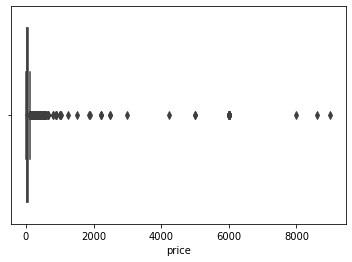

In [10]:
sns.boxplot(x=merged_listings.price)

In [11]:
#getting rid of all rows with price more than 300
merged_listings.drop(merged_listings[merged_listings.price > 300].index, axis=0, inplace=True)
merged_listings.price.describe()


count    22387.000000
mean        56.717023
std         38.998556
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max        300.000000
Name: price, dtype: float64

### 2.0 EDA

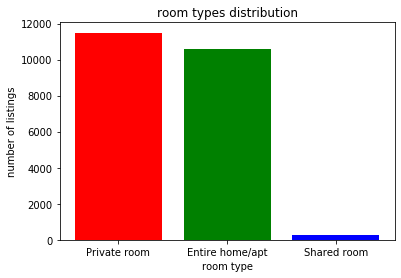

In [12]:
#room type distribution
rtypes = merged_listings['room_type'].value_counts()
plt.bar(rtypes.index, rtypes.values, color='rgb')
plt.title('room types distribution')
plt.xlabel('room type')
plt.ylabel('number of listings')
plt.show()

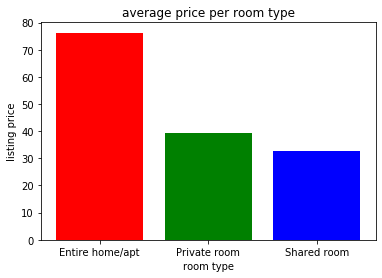

In [13]:
#average price range per room type
rtypes_price =  merged_listings.groupby('room_type')['price'].mean()
plt.bar(rtypes_price.index, rtypes_price.values, color='rgb')
plt.xlabel('room type')
plt.ylabel('listing price')
plt.title('average price per room type')
plt.show()

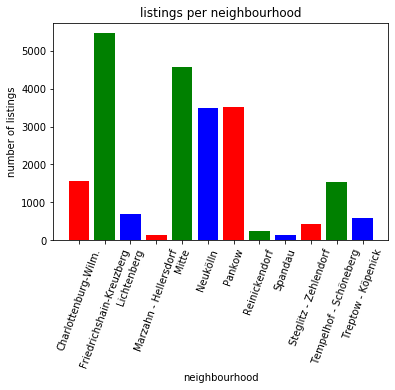

In [14]:
#neighborhood distribution
neighb_count = merged_listings.groupby('neighbourhood_group')['id'].count()
plt.bar(neighb_count.index, neighb_count.values, color='rgb')
plt.xticks(rotation=70)
plt.xlabel('neighbourhood')
plt.ylabel('number of listings')
plt.title('listings per neighbourhood')
plt.show()

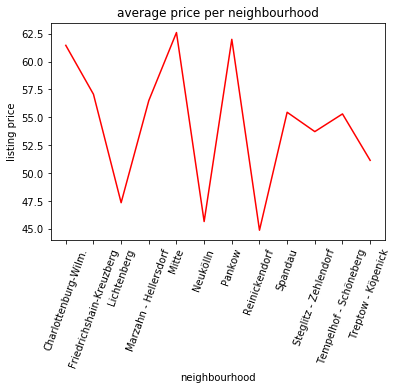

In [15]:
# price range per neighborhood
neighb_price =  merged_listings.groupby('neighbourhood_group')['price'].mean()
plt.plot(neighb_price.index, neighb_price.values, color='red')
plt.xticks(rotation=70)
plt.xlabel('neighbourhood')
plt.ylabel('listing price')
plt.title('average price per neighbourhood')
plt.show()

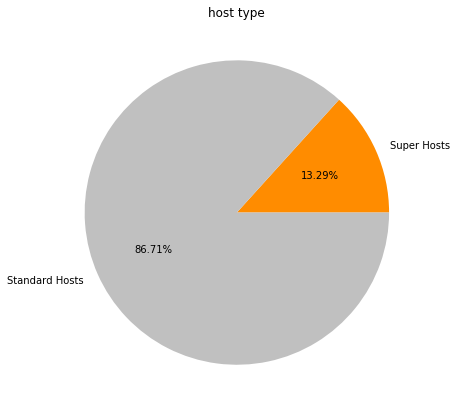

In [16]:
# host types distribution
super_host = merged_listings.host_is_superhost.value_counts()['t']
no_super_host = merged_listings.host_is_superhost.value_counts()['f']
names = ['Super Hosts','Standard Hosts']
size  = [super_host, no_super_host]

# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver'], autopct='%.2f%%')

fig = plt.gcf()
fig.set_size_inches(7,7)
plt.title('host type')
plt.show()

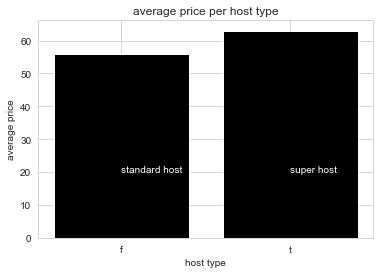

In [61]:
#price range per host type
host_price = merged_listings.groupby('host_is_superhost')['price'].mean()
host_price.to_frame()
plt.bar(host_price.index,host_price.values, color ='black')
plt.xlabel('host type')
plt.ylabel('average price')
plt.title('average price per host type')
plt.text('f', 20, 'standard host', color='white')
plt.text('t', 20, 'super host', color='white')
plt.show()

In [17]:
#filtering out amenities
def wifi(value):
    if "wifi" in value.lower():
        return 1
    else:
        return 0
    
merged_listings['Wifi'] = merged_listings['amenities'].apply(wifi)

def tv(value):
    if "tv" in value.lower():
        return 1
    else:
        return 0
    
merged_listings['Tv'] = merged_listings['amenities'].apply(tv)



Text(0.5, 1.0, 'Wifi in apartments')

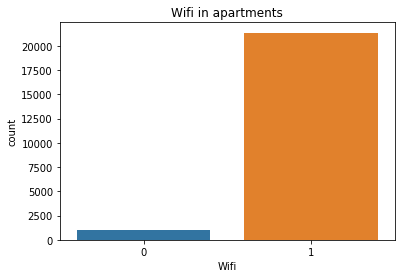

In [18]:
# presence of Wi-Fi in appartments
sns.countplot(merged_listings['Wifi'])
plt.title('Wifi in apartments')


Text(0.5, 1.0, 'TV in apartments')

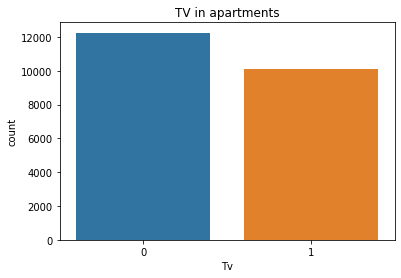

In [19]:
#presence TV in appartments
sns.countplot(merged_listings['Tv'])
plt.title('TV in apartments')

### 3.0 Adding Features

#### a) occupancy estimate

In [20]:
# Review Rate of 50% is used, meaning that every other occupant left a review
#an average length of stay for each city is usually published by Airbnb, 4.2 in the case of Berlin
#I calculated the occupancy by multiplying the avg-length and the nb of reviews per month over the modest review rate pciked
avg_length_of_stay_berlin = 4.2
review_rate_modest = 0.5

# calculate the occupancy and round the result
merged_listings['modest_occupancy'] = round(avg_length_of_stay_berlin * (merged_listings['reviews_per_month']/review_rate_modest), 2)

# occupancy cannot be greater than 100% 
len(merged_listings[merged_listings['modest_occupancy'] > 100])

# let's drop occupancy rates > 100
merged_listings.drop(merged_listings[(merged_listings['modest_occupancy'] > 100)].index, axis=0, inplace=True)

# check the distribution
merged_listings['modest_occupancy'].describe()


count    18532.000000
mean         9.482299
std         12.199216
min          0.080000
25%          1.430000
50%          4.540000
75%         12.600000
max         93.740000
Name: modest_occupancy, dtype: float64

In [21]:
# in this approach I am taking a more optimistic review rate of 40% and doing the same calculations above
review_rate_optimistic = 0.4

# calculate the occupancy and round the result
merged_listings['optimistic_occupancy'] = round(avg_length_of_stay_berlin * (merged_listings['reviews_per_month']/review_rate_optimistic), 2)

# occupancy cannot be greater than 100% 
len(merged_listings[merged_listings['optimistic_occupancy'] > 100])


# let's drop the occupancy rates > 100
merged_listings.drop(merged_listings[(merged_listings['optimistic_occupancy'] > 100)].index, axis=0, inplace=True)

# check the distribution
merged_listings['optimistic_occupancy'].describe()


count    18512.000000
mean        11.748946
std         14.924017
min          0.100000
25%          1.780000
50%          5.670000
75%         15.750000
max         99.020000
Name: optimistic_occupancy, dtype: float64

Text(18, 4500, 'Median (Optimistic Estimate)')

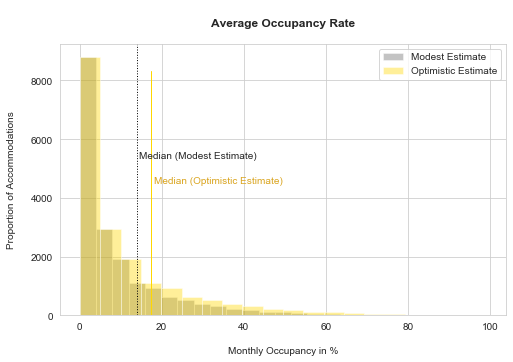

In [25]:
#plotting the results of the occupancy rates 
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(merged_listings['modest_occupancy'], kde=False, bins=20, color='dimgrey')
sns.distplot(merged_listings['optimistic_occupancy'], kde=False, bins=20, color='gold')

plt.title('\nAverage Occupancy Rate\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nMonthly Occupancy in %')
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=14, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(14.5, 5350, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=17.5, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='gold')
plt.text(18, 4500, 'Median (Optimistic Estimate)', color='goldenrod')


### b) income estimate


In [23]:
#calculation the annual income estimation by multiplying either the modest or optimistic occupancy by the price and then by 12 months
merged_listings['modest_income'] = merged_listings['modest_occupancy'] * merged_listings['price'] * 12
merged_listings.modest_income.describe()

merged_listings['optimistic_income'] = merged_listings['optimistic_occupancy'] * merged_listings['price'] * 12
merged_listings.optimistic_income.describe()


count     18512.000000
mean       8528.861493
std       14590.969775
min           0.000000
25%         912.000000
50%        3203.820000
75%        9926.400000
max      348466.560000
Name: optimistic_income, dtype: float64

Text(12000, 2350, 'Median (Optimistic Estimate)')

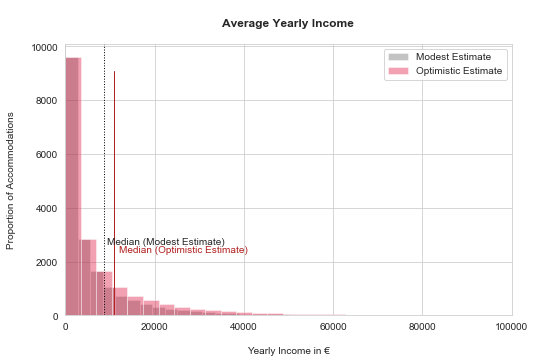

In [24]:
#plotting the results of the yearly income rates
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

sns.distplot(merged_listings['modest_income'], kde=False, bins=100, color='dimgrey')
sns.distplot(merged_listings['optimistic_income'], kde=False, bins=100, color='crimson')

plt.title('\nAverage Yearly Income\n', fontweight='bold')
plt.legend(['Modest Estimate', 'Optimistic Estimate'])
plt.xlabel('\nYearly Income in €')
plt.xlim((0,100000))
plt.ylabel('Proportion of Accommodations\n')

# draw and label a line with median value of modest estimate
plt.axvline(x=8709, ymin=0, ymax=1, linewidth=1, linestyle=':', color='black')
plt.text(9350, 2650, 'Median (Modest Estimate)')

# draw and label a line with median value of optimistic estimate
plt.axvline(x=10886, ymin=0, ymax=0.9, linewidth=1, linestyle='-', color='firebrick')
plt.text(12000, 2350, 'Median (Optimistic Estimate)', color='firebrick')